## Student Performance Prediction using Regression Models

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import pylab as pl

## Reading the data

In [3]:
df = pd.read_csv("Student_Performance.csv")
df.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66
5,3,78,No,9,6,61
6,7,73,Yes,5,6,63
7,8,45,Yes,4,6,42
8,5,77,No,8,2,61
9,4,89,No,4,0,69


## Data Exploration

In [4]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [5]:
cdf = df[["Hours Studied","Previous Scores","Sleep Hours","Sample Question Papers Practiced","Performance Index"]]
cdf.head(10)

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91
1,4,82,4,2,65
2,8,51,7,2,45
3,5,52,5,2,36
4,7,75,8,5,66
5,3,78,9,6,61
6,7,73,5,6,63
7,8,45,4,6,42
8,5,77,8,2,61
9,4,89,4,0,69


array([[<Axes: title={'center': 'Hours Studied'}>,
        <Axes: title={'center': 'Previous Scores'}>],
       [<Axes: title={'center': 'Sleep Hours'}>,
        <Axes: title={'center': 'Sample Question Papers Practiced'}>],
       [<Axes: title={'center': 'Performance Index'}>, <Axes: >]],
      dtype=object)

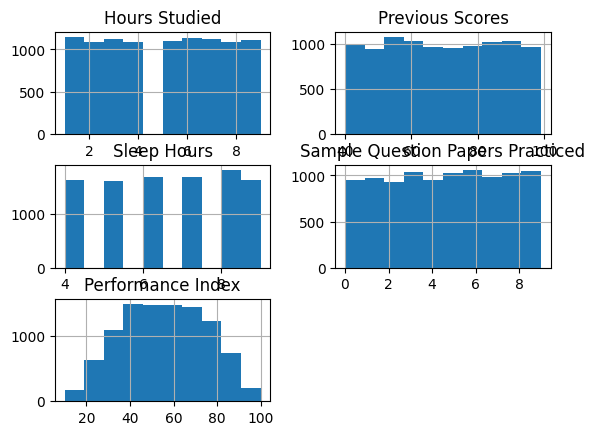

In [6]:
viz = cdf[["Hours Studied","Previous Scores","Sleep Hours","Sample Question Papers Practiced","Performance Index"]]
viz.hist()

Text(0, 0.5, 'Performance Index')

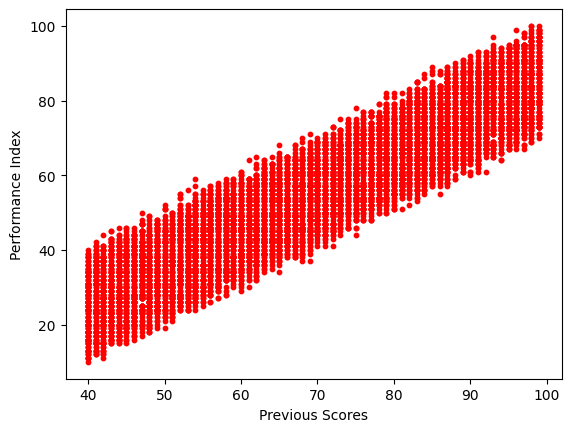

In [7]:
plt.scatter(cdf["Previous Scores"], cdf["Performance Index"], color="red", s=10)
plt.xlabel("Previous Scores")
plt.ylabel("Performance Index")

## Creating train and test dataset

In [8]:
msk = np.random.rand(len(df)) < .8
train = cdf[msk]
test = cdf[~msk]
print(len(train))
print(len(test))

8068
1932


## Train data distribution

Text(0, 0.5, 'Performance Index')

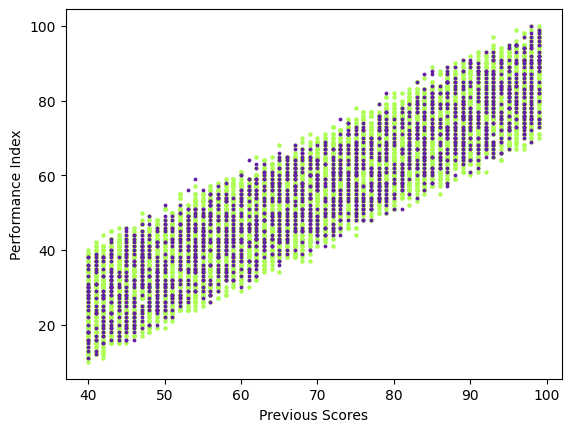

In [9]:
plt.scatter(train["Previous Scores"],train["Performance Index"],color="#adfd56" , s=5)
plt.scatter(test["Previous Scores"],test["Performance Index"],color="#651FA6" ,s=3)
plt.xlabel("Previous Scores")
plt.ylabel("Performance Index")

## modeling

In [10]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[["Previous Scores"]])
train_y = np.asanyarray(train[["Performance Index"]])
regr.fit(train_x,train_y)
print("Coefficients : ",regr.coef_)
print("Intercept : ",regr.intercept_)
train_x

Coefficients :  [[1.01333721]]
Intercept :  [-15.14253998]


array([[99],
       [82],
       [51],
       ...,
       [83],
       [97],
       [74]], shape=(8068, 1))

## Plot outputs

Text(0, 0.5, 'Performance Index')

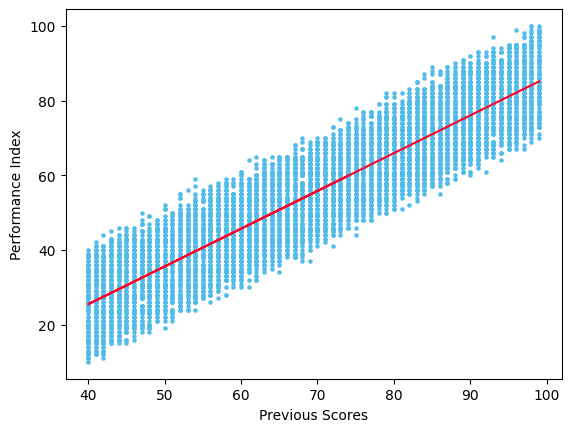

In [86]:
plt.scatter(train["Previous Scores"],train["Performance Index"],color="#51BCE8" , s=5)
plt.plot(train_x , train_x * regr.coef_[0][0] + regr.intercept_[0] , color="#FF0027")
plt.xlabel("Previous Scores")
plt.ylabel("Performance Index")

## Evaluation

In [ ]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[["Previous Scores"]])
test_y = np.asanyarray(test[["Performance Index"]])
test_y_ = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) **2))
print("R2-score: %.2f" % r2_score(test_y , test_y_))